In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
steel=pd.read_csv("Steel_industry_data.csv")

In [3]:
steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
steel.shape

(35040, 11)

In [5]:
steel.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [6]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
steel.nunique()

date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [8]:
steel.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [9]:
steel.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


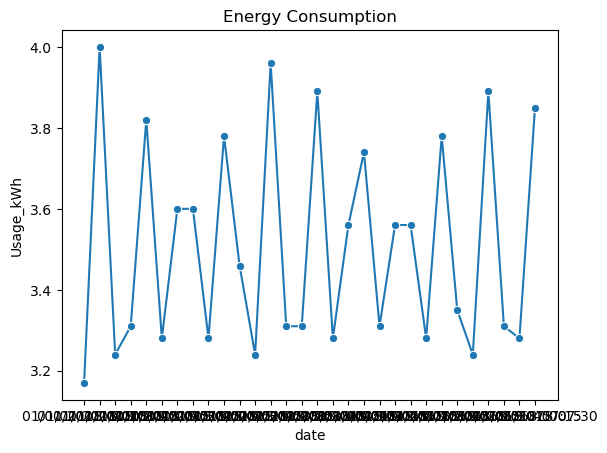

In [10]:
sns.lineplot(data=steel[:30],x='date',y='Usage_kWh',marker='o')
plt.xlabel('date')
plt.ylabel('Usage_kWh')
plt.title('Energy Consumption')
plt.show()

<Axes: xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

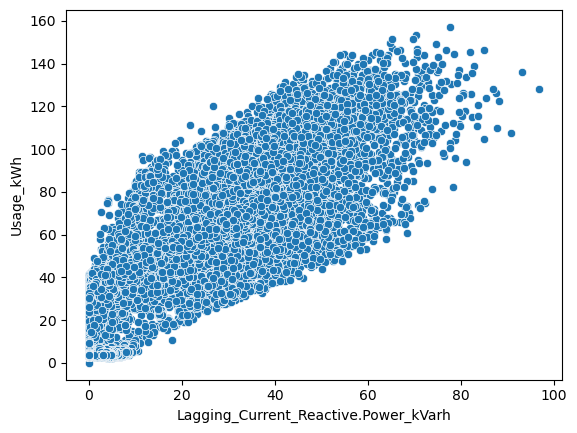

In [11]:
sns.scatterplot(data=steel,x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh')

<Axes: xlabel='Leading_Current_Reactive_Power_kVarh', ylabel='Usage_kWh'>

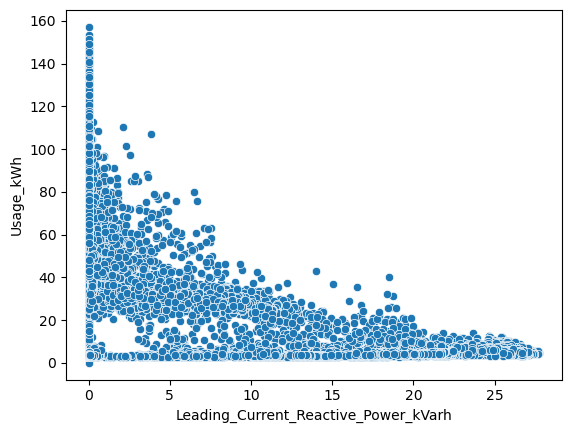

In [12]:
sns.scatterplot(data=steel,x='Leading_Current_Reactive_Power_kVarh',y='Usage_kWh')

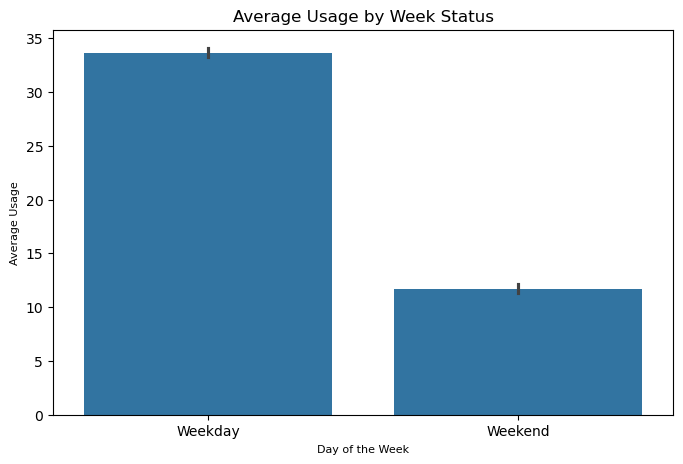

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=steel, x="WeekStatus", y="Usage_kWh")
plt.xlabel("Day of the Week", fontsize=8)
plt.ylabel("Average Usage", fontsize=8)
plt.title("Average Usage by Week Status", fontsize=12)
plt.show()

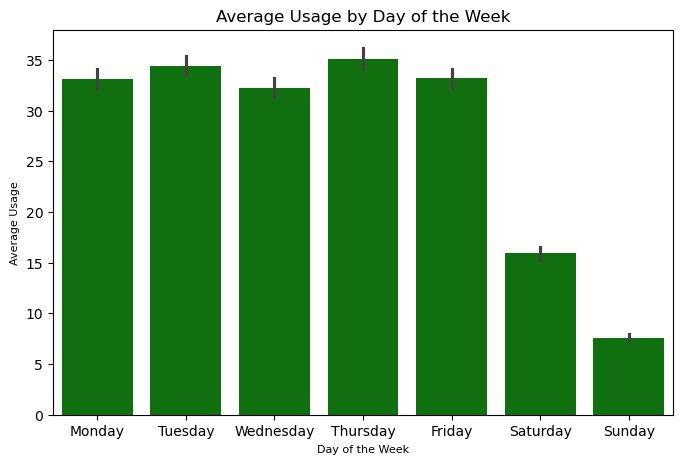

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=steel, x="Day_of_week", y="Usage_kWh",color='green')
plt.xlabel("Day of the Week", fontsize=8)
plt.ylabel("Average Usage", fontsize=8)
plt.title("Average Usage by Day of the Week", fontsize=12)
plt.show()

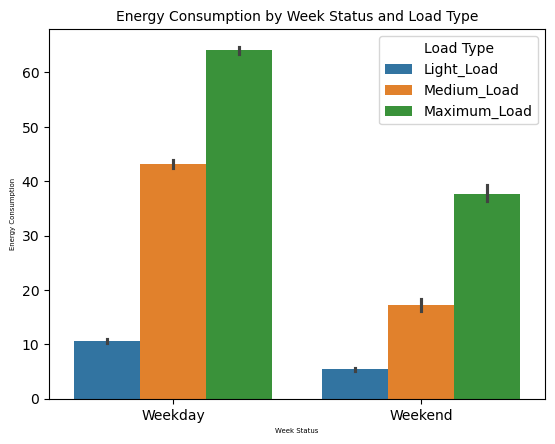

In [15]:
sns.barplot(data=steel, x="WeekStatus", y="Usage_kWh", hue="Load_Type")
plt.xlabel("Week Status", fontsize=5)
plt.ylabel("Energy Consumption", fontsize=5)
plt.title("Energy Consumption by Week Status and Load Type", fontsize=10)
plt.legend(title="Load Type", title_fontsize=10)
plt.show()

<Axes: xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Count'>

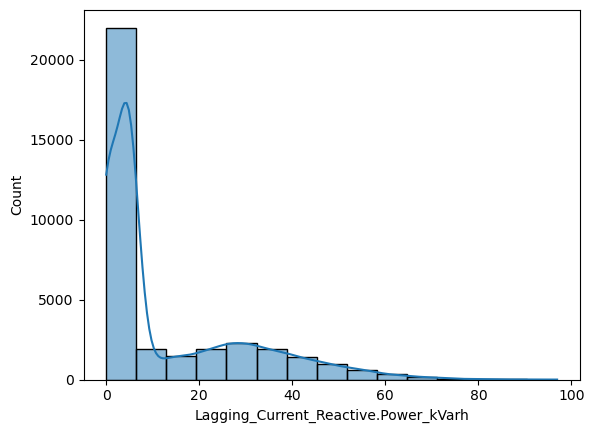

In [16]:
sns.histplot(data=steel,x='Lagging_Current_Reactive.Power_kVarh',kde=True,bins=15)

In [17]:
correlation=steel[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']].corr()
correlation

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


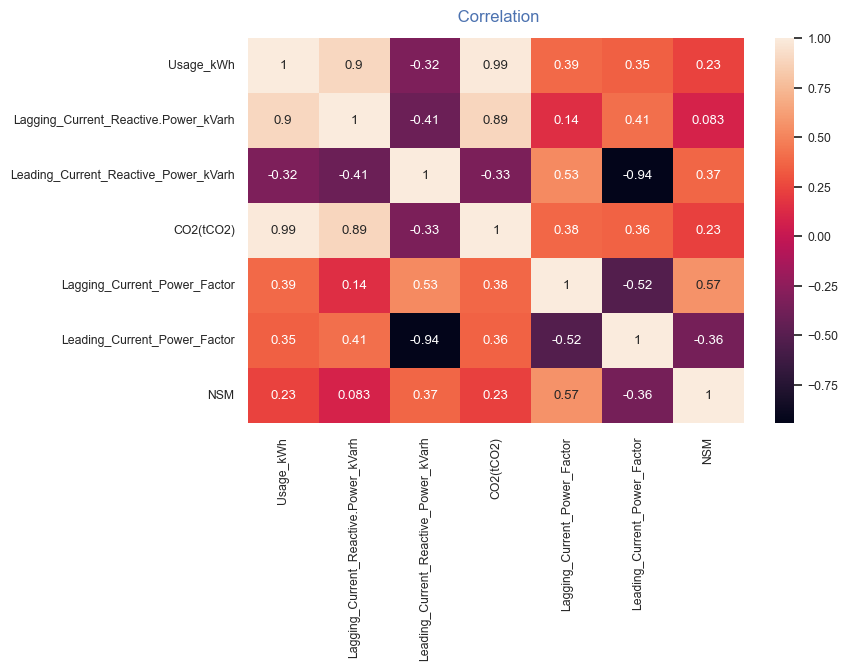

In [18]:
sns.set(font_scale=0.8)
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True)
plt.title(" Correlation", fontsize = 12, color = 'b', pad = 12, loc = 'center')
plt.show()

In [19]:
numerical_cols=steel.select_dtypes(include=[np.number]).columns.tolist()

In [20]:
Q1 = steel[numerical_cols].quantile(0.25)
Q3 = steel[numerical_cols].quantile(0.75)
IQR = Q3-Q1

In [21]:
lower_bound=Q1-1.5*IQR
lower_bound

Usage_kWh                                 -68.85625
Lagging_Current_Reactive.Power_kVarh      -28.21000
Leading_Current_Reactive_Power_kVarh       -3.13500
CO2(tCO2)                                  -0.03000
Lagging_Current_Power_Factor                9.76625
Leading_Current_Power_Factor               99.25000
NSM                                    -42750.00000
dtype: float64

In [22]:
upper_bound=Q3+1.5*IQR
upper_bound

Usage_kWh                                  123.29375
Lagging_Current_Reactive.Power_kVarh        53.15000
Leading_Current_Reactive_Power_kVarh         5.22500
CO2(tCO2)                                    0.05000
Lagging_Current_Power_Factor               152.57625
Leading_Current_Power_Factor               100.45000
NSM                                     128250.00000
dtype: float64

In [23]:
outliers=steel[numerical_cols][(steel[numerical_cols]<lower_bound)|(steel[numerical_cols]>upper_bound)].sum()
outliers

Usage_kWh                                43145.63
Lagging_Current_Reactive.Power_kVarh     64861.67
Leading_Current_Reactive_Power_kVarh    130465.19
CO2(tCO2)                                   26.49
Lagging_Current_Power_Factor                 0.00
Leading_Current_Power_Factor            285313.07
NSM                                          0.00
dtype: float64

In [24]:
top_outliers_cols=outliers.sort_values(ascending=False).head(5).index.tolist()

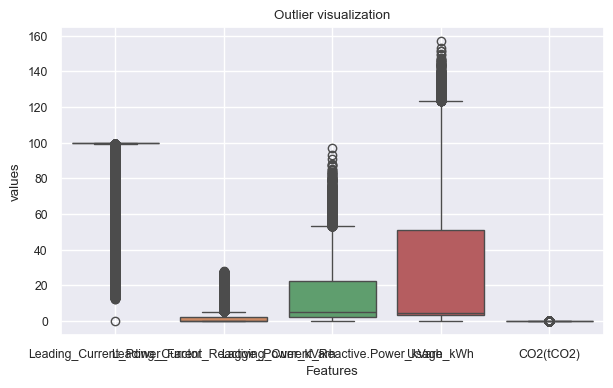

Usage_kWh                                  0
Lagging_Current_Reactive.Power_kVarh    1059
Leading_Current_Reactive_Power_kVarh    7759
CO2(tCO2)                                437
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor            8327
NSM                                        0
dtype: int64

In [25]:
plt.figure(figsize=(7,4))
sns.boxplot(data=steel[top_outliers_cols])
plt.title("Outlier visualization")
plt.xlabel("Features")
plt.ylabel("values")
plt.grid(True)
plt.show()
for col in numerical_cols:
    lower_clip=steel[col].quantile(0.01)
    upper_clip=steel[col].quantile(0.99)
    steel[col]=steel[col].clip(lower=lower_clip, upper=upper_clip)

outliers_after=((steel[numerical_cols]<lower_bound)|(steel[numerical_cols]>upper_bound)).sum()
outliers_after

In [26]:
steel

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [27]:
steel=steel.drop(['date'], axis=1)

In [28]:
steel = pd.get_dummies(steel)

In [29]:
steel.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,True,False,False,True,False,False,False,False,False,True,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,True,False,False,True,False,False,False,False,False,True,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,True,False,False,True,False,False,False,False,False,True,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,True,False,False,True,False,False,False,False,False,True,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,True,False,False,True,False,False,False,False,False,True,False,False


In [30]:
X = steel.drop(['Usage_kWh'], axis=1)  
y=steel.Usage_kWh    

In [31]:
from sklearn.feature_selection import SelectKBest,f_regression
y_=y.astype('int')
select_reg =  SelectKBest(k=10, score_func=f_regression).fit(X, y_)

In [32]:
X_Select = select_reg.transform(X)
X_Select.shape

(35040, 10)

In [33]:
Selected_features = pd.DataFrame({'columns': X.columns,
                              'Kept': select_reg.get_support()})
Selected_features

,columns,Kept
0,Lagging_Current_Reactive.Power_kVarh,True
1,Leading_Current_Reactive_Power_kVarh,True
2,CO2(tCO2),True
3,Lagging_Current_Power_Factor,True
4,Leading_Current_Power_Factor,True
5,NSM,False
6,WeekStatus_Weekday,True
7,WeekStatus_Weekend,True
8,Day_of_week_Friday,False
9,Day_of_week_Monday,False


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_Select)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (24528, 10)
Testing Set - X_test shape: (10512, 10)
Training Set - y_train shape: (24528,)
Testing Set - y_test shape: (10512,)


In [36]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
#The intercept term of the linear model
lr.intercept_

27.33865609541393

In [38]:
# The coefficients of the linear model
lr.coef_

array([ 5.50507771e+00,  5.17733935e-01,  2.59801951e+01,  2.50138209e+00,
        2.03652047e+00, -4.01500793e+11, -4.01500793e+11,  9.57590418e-02,
       -9.00615098e-01, -1.88299851e-01])

In [39]:
y_pred=lr.predict(X_test)

In [40]:
lr_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
lr_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.118930,-0.238930
26543,60.77,70.163668,-9.393668
2445,120.42,123.958041,-3.538041
14649,3.13,2.514681,0.615319
32699,58.86,63.454104,-4.594104


In [41]:
print('LinearRegression model')
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lr.score(X_train,y_train),4))
print('R sqaured testing',round(lr.score(X_test,y_test),4) )

LinearRegression model
Sqaured mean error 4.15
R squared training 0.9797
R sqaured testing 0.9844


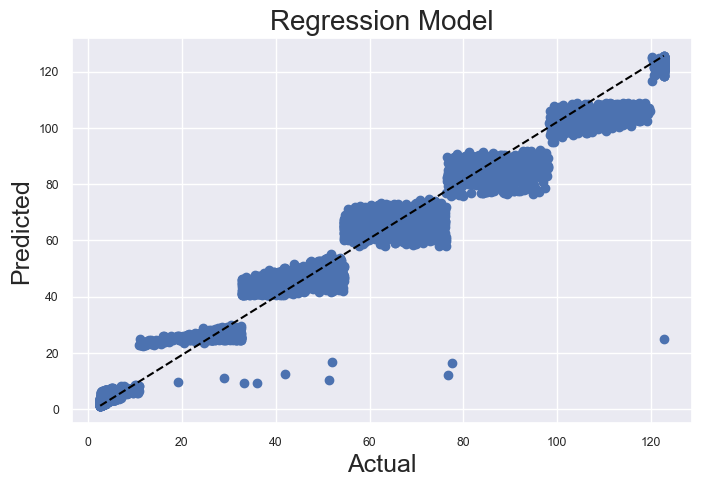

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='black',linestyle='--',label='Perfect line')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Regression Model", fontsize=20)
plt.show()

In [43]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5)

In [44]:
yridge_pred=ridge.predict(X_test)

In [45]:
ridge_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yridge_pred,'Difference':y_test-yridge_pred})
ridge_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.117737,-0.237737
26543,60.77,70.164459,-9.394459
2445,120.42,123.953742,-3.533742
14649,3.13,2.513520,0.616480
32699,58.86,63.451473,-4.591473


In [46]:
print('Ridge Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yridge_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(ridge.score(X_train,y_train),4))
print('R sqaured testing',round(ridge.score(X_test,y_test),4) )

Ridge Regression Model
Sqaured mean error 4.15
R squared training 0.9797
R sqaured testing 0.9844


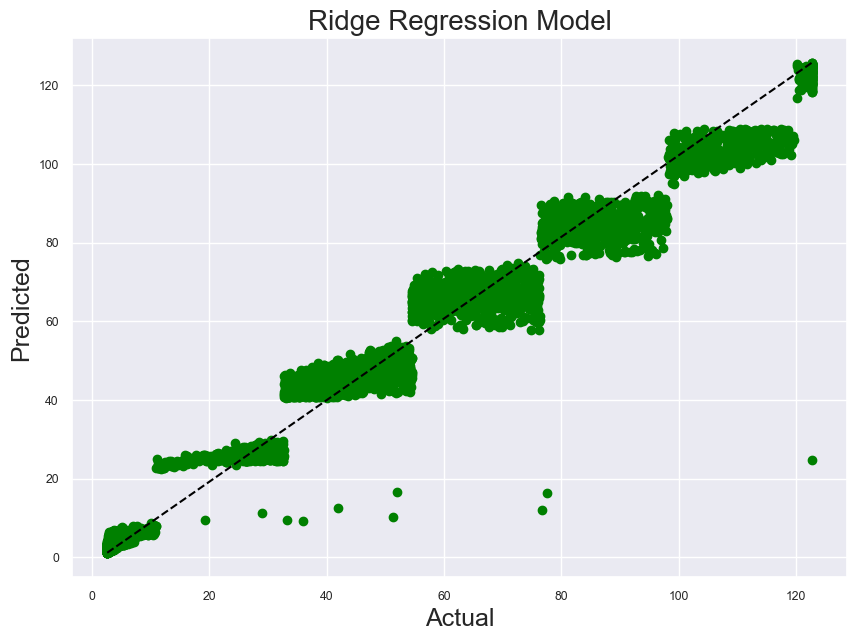

In [47]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yridge_pred, color='green')
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='black',linestyle='--',label='Perfect line')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Ridge Regression Model", fontsize=20)
plt.show()

In [48]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [49]:
ylasso_pred=lasso.predict(X_test)

In [50]:
lasso_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ylasso_pred,'Difference':y_test-ylasso_pred})
lasso_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,3.523370,-0.643370
26543,60.77,69.103384,-8.333384
2445,120.42,124.394141,-3.974141
14649,3.13,4.023906,-0.893906
32699,58.86,62.691082,-3.831082


In [51]:
print('Lasso Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,ylasso_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lasso.score(X_train,y_train),4))
print('R sqaured testing',round(lasso.score(X_test,y_test),4) )

Lasso Regression Model
Sqaured mean error 4.21
R squared training 0.9785
R sqaured testing 0.984


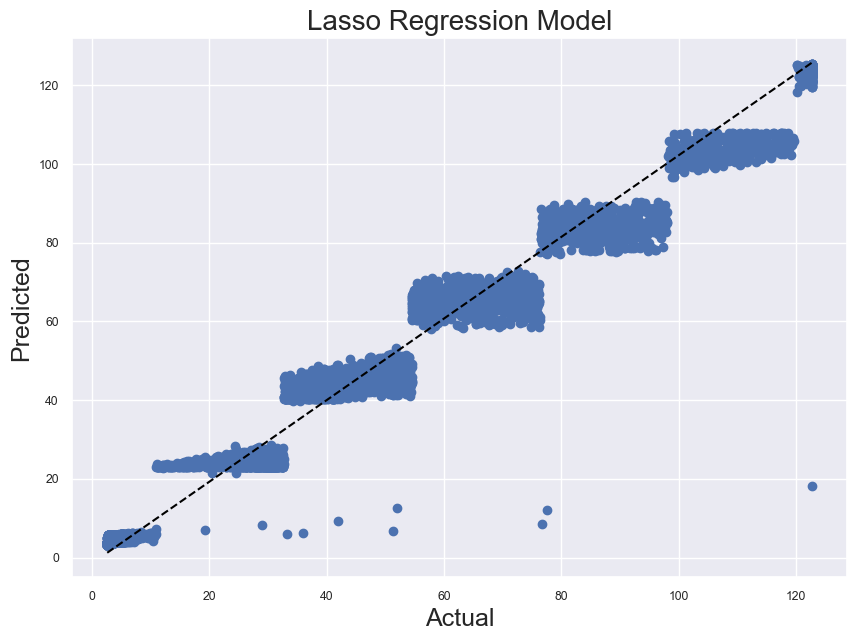

In [52]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, ylasso_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='black',linestyle='--',label='Perfect line')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Lasso Regression Model", fontsize=20)
plt.show()

In [53]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor=DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train,y_train)

y_pred=dt_regressor.predict(X_test)

print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(dt_regressor.score(X_train,y_train),4))
print('R sqaured testing',round(dt_regressor.score(X_test,y_test),4) )

Sqaured mean error 4.21
R squared training 1.0
R sqaured testing 0.9982


In [54]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [55]:
yregressor_pred = regressor.predict(X_test)
regressor_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yregressor_pred,'Difference':y_test-yregressor_pred})
regressor_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,2.904103,-0.024103
26543,60.77,60.843240,-0.073240
2445,120.42,121.098027,-0.678027
14649,3.13,3.167178,-0.037178
32699,58.86,61.529640,-2.669640


In [56]:
print('Support Vector Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yregressor_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train,y_train),4))
print('R sqaured testing',round(regressor.score(X_test,y_test),4) )

Support Vector Regression Model
Sqaured mean error 2.5
R squared training 0.9941
R sqaured testing 0.9944


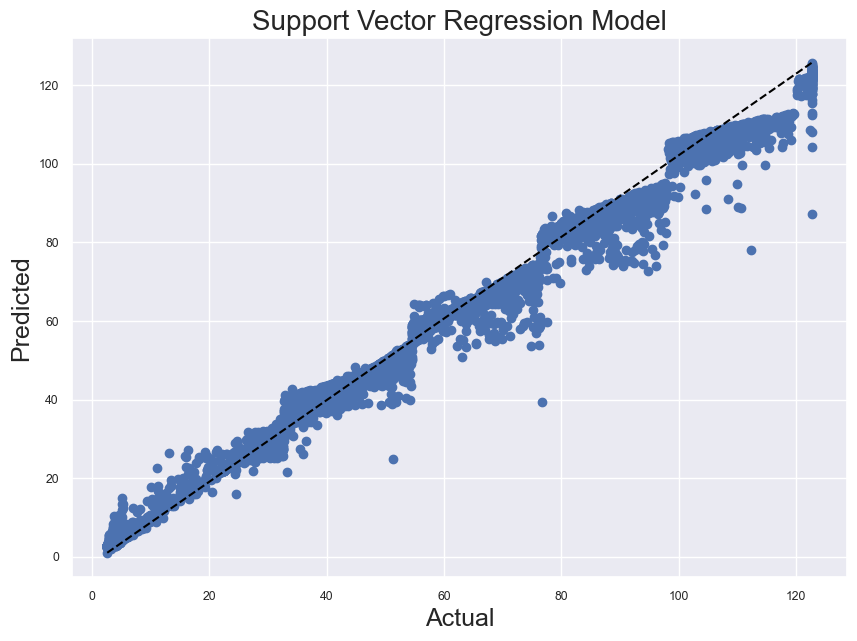

In [57]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test,yregressor_pred)
plt.plot([min(y_test),max(y_test)],[min(yregressor_pred),max(yregressor_pred)],color='black',linestyle='--',label='Perfect line')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Support Vector Regression Model", fontsize=20)
plt.show()

In [ ]:
#Conclusion:
#Decision Tree with 0.9982 is the best performing model. 